# <span style="color:blue">งานฝึกปฏิบัติเดี่ยว สัปดาห์ที่ 13</span>
## <span style="color:green">(100 คะแนน) ข้อกำหนดของงานในภาพรวมเป็นการทดสอบความเข้าใจในเรื่อง Transfer Learning และ Data Augmentation โดยให้ใช้โมเดล pre-trained VGG16 (เทรนด้วยรูปภาพจาก ImageNet ที่มีจำนวนคลาส 1,000 ประเภท) มาปรับแต่งและเทรนเพิ่มเพื่อให้โมเดลสามารถจำแนกภาพจากชุดข้อมูลที่ให้มาได้</span>
  
#### <li style='line-height: 150% !important;'> (20 คะแนน) โค้ดด้านล่างนี้ใช้ดาวน์โหลดชุดข้อมูล train และ test พร้อมชื่อคลาสเข้ามาในโปรแกรม หลังจากที่ดาวน์โหลดชุดข้อมูลเรียบร้อยแล้ว ให้นิสิตแบ่งชุดข้อมูล train ออกเป็น 2 ส่วนในอัตราส่วน 80:20 และให้แต่ละคลาสมีจำนวนข้อมูลเท่ากัน โดยข้อมูลที่ถูกแบ่งให้เก็บอยู่ในชุดข้อมูลใหม่ที่เป็น train และ val ตามลำดับ </li>

```python
import gdown, pickle

url = "https://drive.google.com/uc?id=1fCiTC3a4EgoOV0E6Jiv-w0UeGDJwhGdf"

saved_fname = "data.pkl"
gdown.download(url, saved_fname, quiet=False)
(class_names, X_train, y_train, X_test, y_test) = pickle.load(open(saved_fname, "rb"))
```

#### <li style='line-height: 150% !important;'> (40 คะแนน) ให้ใช้โมเดล pre-trained VGG16  มาปรับแต่งและเทรนเพิ่มเพื่อให้โมเดลสามารถจำแนกรูปภาพในชุดข้อมูลใหม่นี้ได้ และเมื่อเทรนโมเดลแล้วเสร็จ ให้แสดงกราฟของค่า loss และ accuracy ด้วย นอกจากนี้ ให้ใช้ชุดข้อมูล test เพื่อแสดง Confusion Matrix และคำนวณหาค่า Accuracy, Precision, Recall, และ F1-Score (โค้ดด้านล่างเป็นตัวอย่างในการคำนวณค่าเหล่านี้) </li>

```python
from sklearn.metrics import classification_report

y_test_1d = np.argmax(y_test, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)
    
print(classification_report(y_true=y_test_1d, y_pred=y_pred_1d, target_names=class_names))
```

#### <li style='line-height: 150% !important;'> (40 คะแนน) ให้เทรนโมเดล pre-trained VGG16 เพิ่มอีกโมเดลแต่สามารถปรับแต่งโครงสร้างให้แตกต่างจากโมเดลแรกได้ โดยให้ใช้ Data Augmentation ที่อย่างน้อยใช้การแปลง image shifting และ rotation ร่วมในการเทรน หลังจากนั้น ให้เปรียบเทียบโมเดลใหม่นี้กับโมเดลที่ได้จากข้อก่อนหน้า <span style="color:magenta"> โดยอธิบายผลลัพธ์ที่ได้จากการเปรียบเทียบค่าตัววัดประสิทธิภาพที่ได้จากโมเดลทั้งสองนี้</span> นอกจากนี้ ในการเทรนโมเดลทั้ง 2 โมเดลนี้ ให้ใช้ loss function, optimizer, metrics, epochs, และ learning_rate ที่เหมือนกัน หลังจากนั้น จากโมเดลแรก ให้พิจารณาคลาสที่มีค่า Precision สูงสุด โดยให้แสดงภาพจำนวน 3 ภาพที่โมเดลทำนายผิด โดยให้แสดงผลทำนายจากทั้งโมเดลแรกและโมเดลที่ผ่านการเทรนด้วย data augmentation พร้อมแสดงค่าคลาสจริงของภาพนั้นออกมาด้วย</li>

#### <span style="color:red"><li style='line-height: 150% !important;'> โค้ดและคำตอบในแต่ละข้อต้องแสดงให้เห็นอย่างชัดเจน </li></span>

#### <span style="color:red"><li style='line-height: 150% !important;'> เพื่อป้องกันผลกระทบจาก randomness ให้นิสิตใช้ค่า seed เป็น 12345 เท่านั้น และห้ามใช้ Early Stopping และห้ามเลือกเพียง Best Weights ในการเทรนโมเดล โดยการเทรนโมเดลต้องมีจำนวน epoch ที่หารด้วย 10 ลงตัวและไม่น้อยกว่า 20</li></span>

In [82]:
import  pickle

saved_fname = "data.pkl"

(class_names, X_train, y_train, X_test, y_test) = pickle.load(open(saved_fname, "rb"))

In [83]:
import os

os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [84]:
print("class_names", class_names)

class_names ['bird', 'cat', 'deer', 'dog', 'horse', 'monkey', 'airplane', 'truck']


In [85]:
import numpy as np
import os, random, tensorflow as tf
import keras, pickle
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = [3, 3]

def set_seed(seed_value=1234):
    random.seed(seed_value)
    np.random.seed(seed_value)
    tf.random.set_seed(seed_value)
    os.environ['PYTHONHASHSEED'] = str(seed_value)

set_seed(12345)

### View an Image

monkey 5


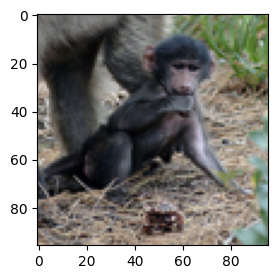

In [86]:
image_id = 11
print(class_names[y_test[image_id]], y_test[image_id])
plt.imshow(X_test[image_id])

## <li><span style="color:blue">(20 คะแนน) หลังจากที่ดาวน์โหลดชุดข้อมูลเรียบร้อยแล้ว ให้นิสิตแบ่งชุดข้อมูล train ออกเป็น 2 ส่วนในอัตราส่วน 80:20 และให้แต่ละคลาสมีจำนวนข้อมูลเท่ากัน โดยข้อมูลที่ถูกแบ่งให้เก็บอยู่ในชุดข้อมูลใหม่ที่เป็น train และ val ตามลำดับ (การแบ่งข้อมูลให้ใช้ค่า random seed ตามที่กำหนด) </li>

สิ่งที่แสดงด้านล่างนี้เป็นตัวอย่างกรณีที่ชุดข้อมูลมีจำนวนคลาส 6 ประเภท
```python
train class: [0 1 2 3 4 5]
train count: [960 960 960 960 960 960]
  val class: [0 1 2 3 4 5]
  val count: [240 240 240 240 240 240]
 test class: [0 1 2 3 4 5]
 test count: [100 100 100 100 100 100]
```

In [87]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train_split = []
y_train_split = []
X_val_split = []
y_val_split = []

for class_index in range(8):
    class_indices = np.where(y_train == class_index)[0]
    X_class = X_train[class_indices]
    y_class = y_train[class_indices]
    
    X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(
        X_class, y_class, test_size=0.2, random_state=12345, stratify=y_class)
    
    X_train_split.append(X_train_class)
    y_train_split.append(y_train_class)
    X_val_split.append(X_val_class)
    y_val_split.append(y_val_class)
X_train = np.concatenate(X_train_split)
y_train = np.concatenate(y_train_split)
X_val= np.concatenate(X_val_split)
y_val = np.concatenate(y_val_split)
print("Train class distribution:", np.bincount(y_train))
print("Validation class distribution:", np.bincount(y_val))

Train class distribution: [980 980 980 980 980 980 980 980]
Validation class distribution: [245 245 245 245 245 245 245 245]


## <span style="color:green">(คะแนนเต็ม 40 คะแนน)</span> <span style="color:blue"><li>(30 คะแนน) ให้ใช้โมเดล pre-trained VGG16  มาปรับแต่งและเทรนเพิ่มเพื่อให้โมเดลสามารถจำแนกรูปภาพในชุดข้อมูลใหม่นี้ได้ และเมื่อเทรนโมเดลแล้วเสร็จ ให้แสดงกราฟของค่า loss และ accuracy ด้วย </li></span>
### คะแนนในข้อนี้ถูกกำหนดโดยใช้เกณฑ์ด้านล่างนี้ ทั้งนี้ค่า accuracy ต้องถูกแสดงให้ปรากฏชัดเจนเพื่อใช้พิจารณาคะแนน
* #### (10 คะแนน) ค่า accuracy จากข้อมูลเทสอยู่ในช่วง ```[0.00, 0.75)```
* #### (15 คะแนน) ค่า accuracy จากข้อมูลเทสอยู่ในช่วง ```[0.75, 0.80)```
* #### (25 คะแนน) ค่า accuracy จากข้อมูลเทสอยู่ในช่วง ```[0.80, 0.90)```
* #### (30 คะแนน) ค่า accuracy จากข้อมูลเทสอยู่ในช่วง ```[0.90, 0.94)```
* #### (35 คะแนน) ค่า accuracy จากข้อมูลเทสตั้งแต่ ```0.94``` ขึ้นไป

In [88]:
num_classes = 8
batch_size =32

In [89]:
y_train = keras.utils.to_categorical(y_train,num_classes)
y_val = keras.utils.to_categorical(y_val,num_classes)

In [90]:
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
base_model = vgg16.VGG16(weights='imagenet',include_top=False, input_shape=(96, 96, 3))
for layer in base_model.layers:
    layer.trainable = False
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))  

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_9 (Flatten)         (None, 4608)              0         
                                                                 
 dense_18 (Dense)            (None, 512)               2359808   
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_19 (Dense)            (None, 8)                 4104      
                                                                 
Total params: 17,078,600
Trainable params: 2,363,912
Non-trainable params: 14,714,688
_________________________________________________________________


In [91]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [92]:
history = model.fit(X_train,y_train,batch_size=batch_size, epochs=40, validation_data=(X_val, y_val), verbose=1)

Epoch 1/40
245/245 [==============================] - 7s 27ms/step - loss: 9.2593 - accuracy: 0.6148 - val_loss: 2.4160 - val_accuracy: 0.7934
Epoch 2/40
245/245 [==============================] - 7s 27ms/step - loss: 2.6640 - accuracy: 0.7830 - val_loss: 1.7310 - val_accuracy: 0.8153
Epoch 3/40
245/245 [==============================] - 7s 27ms/step - loss: 1.3506 - accuracy: 0.8324 - val_loss: 1.5390 - val_accuracy: 0.8179
Epoch 4/40
245/245 [==============================] - 7s 27ms/step - loss: 0.8271 - accuracy: 0.8670 - val_loss: 1.3720 - val_accuracy: 0.8158
Epoch 5/40
245/245 [==============================] - 7s 27ms/step - loss: 0.5514 - accuracy: 0.8994 - val_loss: 1.3285 - val_accuracy: 0.8276
Epoch 6/40
245/245 [==============================] - 7s 27ms/step - loss: 0.3953 - accuracy: 0.9246 - val_loss: 1.3142 - val_accuracy: 0.8286
Epoch 7/40
245/245 [==============================] - 7s 27ms/step - loss: 0.3004 - accuracy: 0.9314 - val_loss: 1.2518 - val_accuracy: 0.8286

In [93]:
train_accuracy = model.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = model.evaluate(X_val, y_val, verbose=0)[1]
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9999
Test Accuracy: 0.8490


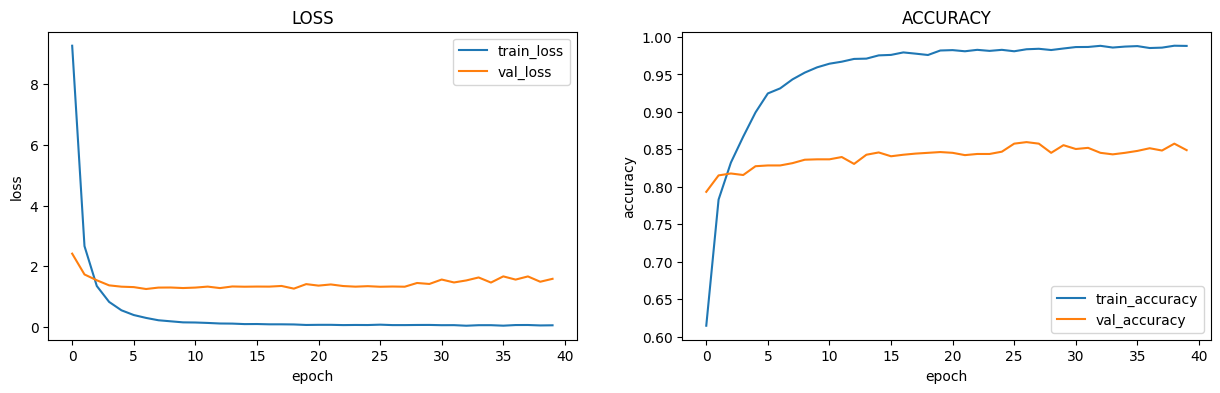

In [94]:
fig = plt.figure(figsize=(15, 4))

# Plot Loss
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label='train_loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_title('LOSS')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(loc='upper right')

# Plot Accuracy
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label='train_accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.set_title('ACCURACY')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(loc='lower right')

plt.show()

## <span style="color:blue"><li>(10 คะแนน) นอกจากนี้ ให้ใช้ชุดข้อมูล test เพื่อแสดง Confusion Matrix และคำนวณหาค่า Accuracy, Precision, Recall, และ F1-Score</li></span>

In [95]:
from IPython import display
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, recall_score,precision_score

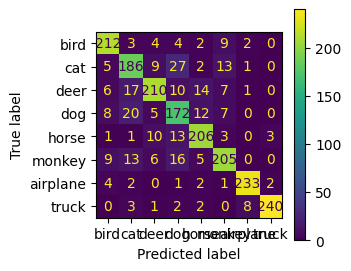

In [ ]:
y_pred = model.predict(X_val, verbose=0)
y_test_1d = np.argmax(y_val, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_true=y_test_1d,y_pred = y_pred_1d).T
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix =cm,display_labels=class_names)
disp.plot()

In [97]:
from sklearn.metrics import classification_report
y_test_1d = np.argmax(y_val, axis=1)
y_pred_1d = np.argmax(y_pred, axis=1)
print(classification_report(y_true=y_test_1d, y_pred=y_pred_1d, target_names=class_names))

              precision    recall  f1-score   support

        bird       0.90      0.87      0.88       245
         cat       0.77      0.76      0.76       245
        deer       0.79      0.86      0.82       245
         dog       0.77      0.70      0.73       245
       horse       0.87      0.84      0.85       245
      monkey       0.81      0.84      0.82       245
    airplane       0.95      0.95      0.95       245
       truck       0.94      0.98      0.96       245

    accuracy                           0.85      1960
   macro avg       0.85      0.85      0.85      1960
weighted avg       0.85      0.85      0.85      1960



## <span style="color:green">(คะแนนเต็ม 40 คะแนน)</span> <li><span style="color:blue">(30 คะแนน) ให้เทรนโมเดล pre-trained VGG16 เพิ่มอีกโมเดลแต่สามารถปรับแต่งโครงสร้างให้แตกต่างจากโมเดลแรกได้ โดยให้ใช้ Data Augmentation ที่อย่างน้อยใช้การแปลง image shifting และ rotation ร่วมในการเทรน หลังจากนั้น ให้เปรียบเทียบโมเดลใหม่นี้กับโมเดลที่ได้จากข้อก่อนหน้า <span style="color:magenta"> โดยอธิบายผลลัพธ์ที่ได้จากการเปรียบเทียบค่าตัววัดประสิทธิภาพที่ได้จากโมเดลทั้งสองนี้</span> นอกจากนี้ ในการเทรนโมเดลทั้ง 2 โมเดลนี้ ให้ใช้ loss function, optimizer, metrics, epochs, และ learning_rate ที่เหมือนกัน</li>

In [98]:
from keras.applications import vgg16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
base_model2 = vgg16.VGG16(weights='imagenet',include_top=False, input_shape=(96, 96, 3))
for layer in base_model.layers:
    layer.trainable = False
model_2 = Sequential()
model_2.add(base_model)
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes, activation='softmax'))  

model_2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 3, 3, 512)         14714688  
                                                                 
 flatten_10 (Flatten)        (None, 4608)              0         
                                                                 
 dense_20 (Dense)            (None, 512)               2359808   
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 8)                 4104      
                                                                 
Total params: 17,078,600
Trainable params: 2,363,912
Non-trainable params: 14,714,688
_________________________________________________________________


In [99]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(X_train)  # This computes any statistics that may be needed (e.g. for centering) from the training set.


In [100]:
model_2.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [101]:
history = model_2.fit(datagen.flow(X_train, y_train, batch_size=batch_size), epochs=40, validation_data=(X_val, y_val), verbose=1)

Epoch 1/40
245/245 [==============================] - 17s 68ms/step - loss: 9.5726 - accuracy: 0.5508 - val_loss: 2.4662 - val_accuracy: 0.7862
Epoch 2/40
245/245 [==============================] - 15s 63ms/step - loss: 3.3204 - accuracy: 0.6848 - val_loss: 1.5739 - val_accuracy: 0.8020
Epoch 3/40
245/245 [==============================] - 15s 63ms/step - loss: 2.0080 - accuracy: 0.7046 - val_loss: 1.1943 - val_accuracy: 0.7939
Epoch 4/40
245/245 [==============================] - 16s 63ms/step - loss: 1.3828 - accuracy: 0.7193 - val_loss: 0.9904 - val_accuracy: 0.7995
Epoch 5/40
245/245 [==============================] - 15s 60ms/step - loss: 1.0898 - accuracy: 0.7315 - val_loss: 0.8878 - val_accuracy: 0.8005
Epoch 6/40
245/245 [==============================] - 15s 61ms/step - loss: 0.9784 - accuracy: 0.7348 - val_loss: 0.7961 - val_accuracy: 0.8071
Epoch 7/40
245/245 [==============================] - 15s 62ms/step - loss: 0.8623 - accuracy: 0.7505 - val_loss: 0.7753 - val_accuracy:

In [103]:
train_accuracy = model_2.evaluate(X_train, y_train, verbose=0)[1]
test_accuracy = model_2.evaluate(X_val, y_val, verbose=0)[1]
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Train Accuracy: 0.9814
Test Accuracy: 0.8633


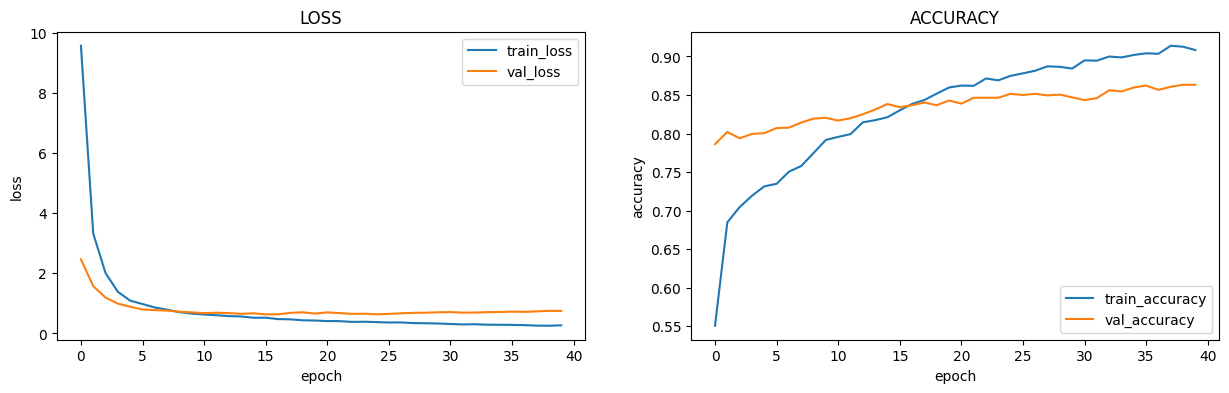

In [105]:
fig = plt.figure(figsize=(15, 4))

# Plot Loss
ax = fig.add_subplot(1, 2, 1)
ax.plot(history.history['loss'], label='train_loss')
ax.plot(history.history['val_loss'], label='val_loss')
ax.set_title('LOSS')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend(loc='upper right')

# Plot Accuracy
ax = fig.add_subplot(1, 2, 2)
ax.plot(history.history['accuracy'], label='train_accuracy')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.set_title('ACCURACY')
ax.set_ylabel('accuracy')
ax.set_xlabel('epoch')
ax.legend(loc='lower right')

plt.show()

ANS = จากผลลัพธ์ที่ได้จากตัวโมเดลทั้ง2ค่านี้ จะเห็นได้ว่าช่วงแรกของฝั่งของโมเดลที่ทำdata augmengation จะมีaccuracyของdata train ต่ำกว่า accuracyของ data val ซึ่งแสดงให้เห็นว่า
ตัว model_2 จะมีการทำนายผลโดยไม่ยึดติดกับdata train และไม่ทำให้เกิดปัญหาOverfitting ที่ตัวโมเดลแรกสามารถเกิดขึ้นได้ จากการที่ไม่ได้ทำ data augmentation

## <li><span style="color:blue">(10 คะแนน) จากโมเดลแรก ให้พิจารณาคลาสที่มีค่า Precision สูงสุด โดยให้แสดงภาพจำนวน 3 ภาพที่โมเดลทำนายผิด โดยให้แสดงผลทำนายจากทั้งโมเดลแรกและโมเดลที่ผ่านการเทรนด้วย data augmentation พร้อมแสดงค่าคลาสจริงของภาพนั้นออกมาด้วย</li>

62/62 [==============================] - 1s 20ms/step
Precision per class: [0.89830508 0.7654321  0.79245283 0.76785714 0.86919831 0.80708661
 0.95102041 0.9375    ]
Class with highest precision: airplane


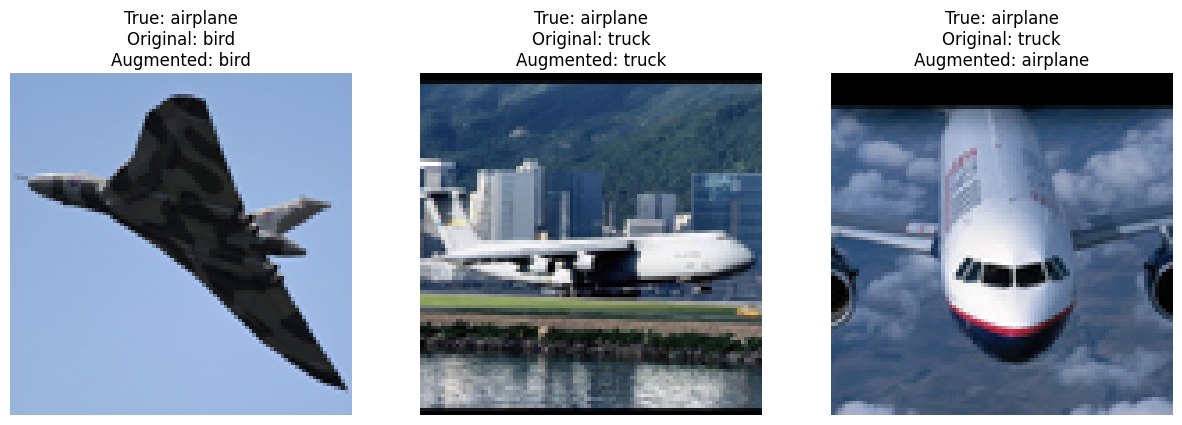

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score

# Make predictions on the validation set using the original model
y_pred_original = model.predict(X_val)
y_pred_classes_original = np.argmax(y_pred_original, axis=1)

# Make predictions on the validation set using the fine-tuned model with data augmentation
y_pred_augmented = model_2.predict(X_val)
y_pred_classes_augmented = np.argmax(y_pred_augmented, axis=1)

# Convert true labels to class labels
y_true = np.argmax(y_val, axis=1)

# Calculate precision for each class using the original model
precision_per_class = precision_score(y_true, y_pred_classes_original, average=None)
print("Precision per class:", precision_per_class)

# Identify the class with the highest precision
highest_precision_class = np.argmax(precision_per_class)
print("Class with highest precision:", class_names[highest_precision_class])

# Find misclassified images for the class with the highest precision
misclassified_indices = np.where((y_true == highest_precision_class) & (y_pred_classes_original != highest_precision_class))[0]

# Display 3 misclassified images
plt.figure(figsize=(15, 5))
for i, idx in enumerate(misclassified_indices[:3]):
    plt.subplot(1, 3, i + 1)
    plt.imshow(X_val[idx])  # Use X_val instead of X_test
    plt.title(f"True: {class_names[y_true[idx]]}\nOriginal: {class_names[y_pred_classes_original[idx]]}\nAugmented: {class_names[y_pred_classes_augmented[idx]]}")
    plt.axis('off')
plt.show()